## California Crime Rates and Demographic Analysis (2000-2013)


The dataset "California Crime Indicators by Demographic and Geographic Segmentation (2000-2013)" contains comprehensive information on crime rates in California from 2000 to 2013. It includes various attributes that allow for detailed analysis of crime patterns based on demographic and geographic factors.

In [34]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
def wrangle(filepath):
    #read csv file into dataframe
    df=pd.read_csv(filepath, low_memory=False)
    
    # Clean and prepare the data
    df.dropna(subset=['rate', 'numerator', 'denominator'], inplace=True)

    df['reportyear'] = pd.to_numeric(df['reportyear'], errors='coerce').fillna(0).astype(int)
    # Calculate crime rate (if denominator is non-zero)
    df['crime_rate'] = df['numerator'] / df['denominator'].replace(0, pd.NA)  # Avoid division by zero
    df['crime_rate'] = df['crime_rate'].fillna(0)  # Fill NA with 0 if rate calculation fails due to 0 denominator


    # Drop rows with missing values if necessary
    df.dropna(inplace=True)

    return df

In [3]:
df=wrangle("hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada2.csv")
print("df shape", df.shape)
df.head()

df shape (6251, 28)


,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version,crime_rate
300,752,"Number of Violent Crimes per 1,000 Population",2000,9.0,Total,PL,296.0,Adelanto city,6071.0,San Bernardino,...,6.563707,5.384386,7.743027,0.601694,9.166985,3.0,1.055683,18130.0,10/21/2015,0.006564
305,752,"Number of Violent Crimes per 1,000 Population",2000,9.0,Total,PL,394.0,Agoura Hills city,6037.0,Los Angeles,...,1.752934,1.180309,2.325559,0.292156,16.666667,9.0,0.281936,20537.0,10/21/2015,0.001753
310,752,"Number of Violent Crimes per 1,000 Population",2000,9.0,Total,PL,562.0,Alameda city,6001.0,Alameda,...,4.179410,3.708034,4.650786,0.240498,5.754353,5.0,0.672201,72259.0,10/21/2015,0.004179
316,752,"Number of Violent Crimes per 1,000 Population",2000,9.0,Total,PL,674.0,Albany city,6001.0,Alameda,...,5.351496,4.233372,6.469620,0.570471,10.660036,4.0,0.860715,16444.0,10/21/2015,0.005351
321,752,"Number of Violent Crimes per 1,000 Population",2000,9.0,Total,PL,884.0,Alhambra city,6037.0,Los Angeles,...,2.948580,2.585244,3.311917,0.185376,6.286946,7.0,0.474239,85757.0,10/21/2015,0.002949


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6251 entries, 300 to 49154
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ind_id                  6251 non-null   object 
 1   ind_definition          6251 non-null   object 
 2   reportyear              6251 non-null   int32  
 3   race_eth_code           6251 non-null   float64
 4   race_eth_name           6251 non-null   object 
 5   geotype                 6251 non-null   object 
 6   geotypevalue            6251 non-null   float64
 7   geoname                 6251 non-null   object 
 8   county_fips             6251 non-null   float64
 9   county_name             6251 non-null   object 
 10  region_code             6251 non-null   float64
 11  region_name             6251 non-null   object 
 12  strata_name_code        6251 non-null   float64
 13  strata_name             6251 non-null   object 
 14  strata_level_name_code  6251 non-null   fl

In [37]:
df.nunique()

ind_id                       1
ind_definition               1
reportyear                  14
race_eth_code                1
race_eth_name                1
geotype                      1
geotypevalue               460
geoname                    459
county_fips                 53
county_name                 53
region_code                 14
region_name                 14
strata_name_code             1
strata_name                  1
strata_level_name_code       1
strata_level_name            1
numerator                 1041
denominator               6023
rate                      6226
ll_95ci                   6061
ul_95ci                   6247
se                        6241
rse                       1041
ca_decile                   10
ca_rr                     6247
dof_population            5994
version                      1
crime_rate                6226
dtype: int64

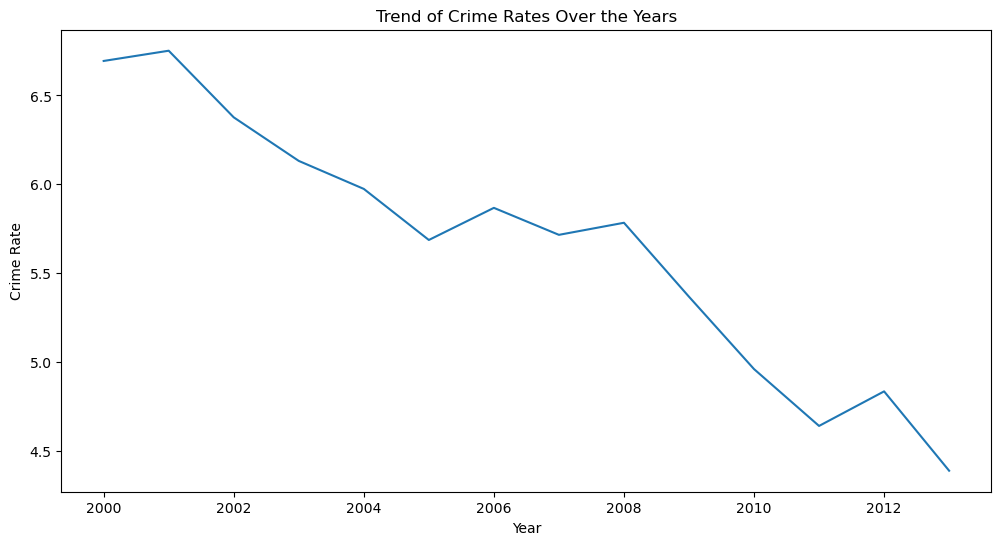

In [5]:
# Exploratory Data Analysis (EDA)
# Trend of Crime Rates Over the Years

plt.figure(figsize=(12, 6))
sns.lineplot(x='reportyear', y='rate', data=df, ci=None)
plt.title("Trend of Crime Rates Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.show()

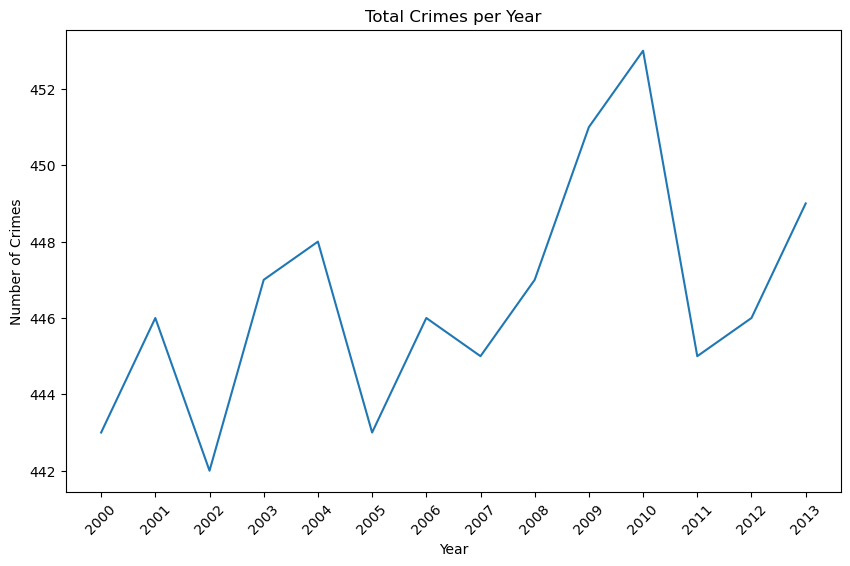

In [6]:
# Total crimes per year
crime_per_year = df['reportyear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_per_year)
plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_per_year.index, rotation=45)
plt.show()

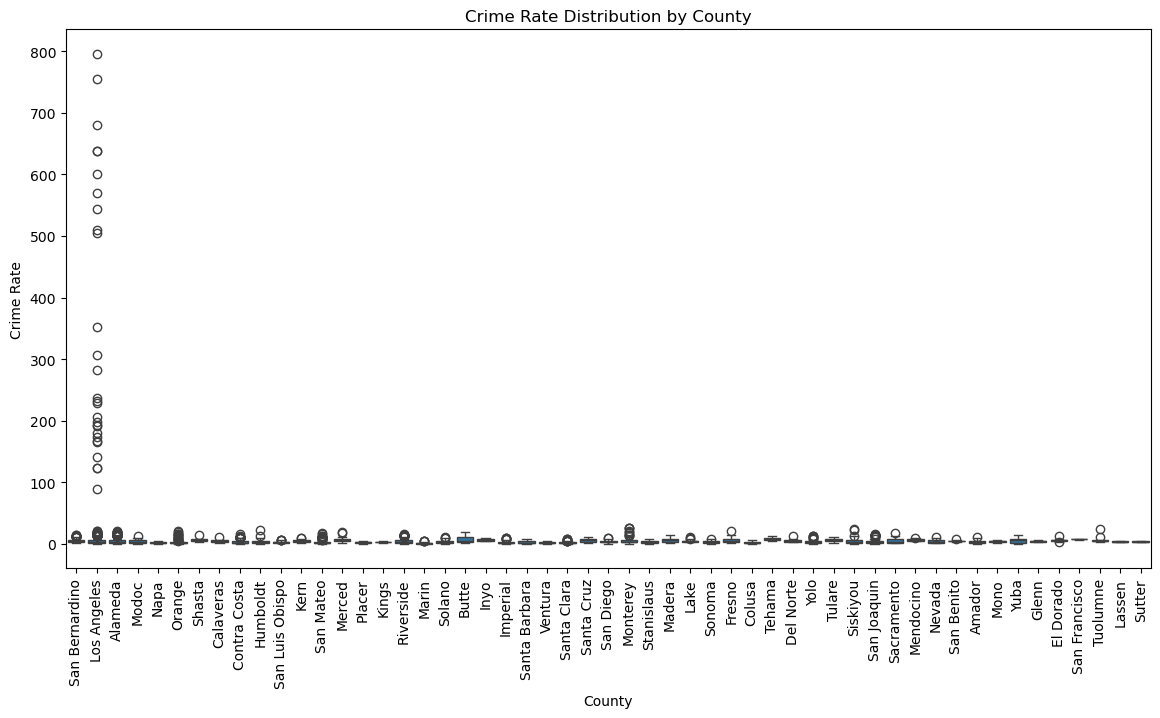

In [7]:
# Comparison of Crime Rates by County
plt.figure(figsize=(14, 7))
sns.boxplot(x='county_name', y='rate', data=df)
plt.title("Crime Rate Distribution by County")
plt.xlabel("County")
plt.ylabel("Crime Rate")
plt.xticks(rotation=90)
plt.show()

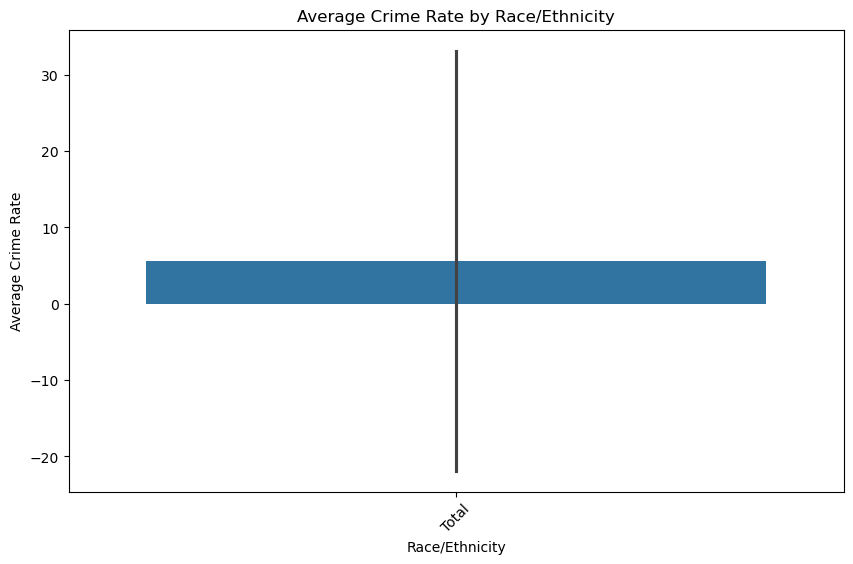

In [8]:
# Crime Rates by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='race_eth_name', y='rate', data=df, estimator='mean', ci='sd')
plt.title("Average Crime Rate by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Crime Rate")
plt.xticks(rotation=45)
plt.show()

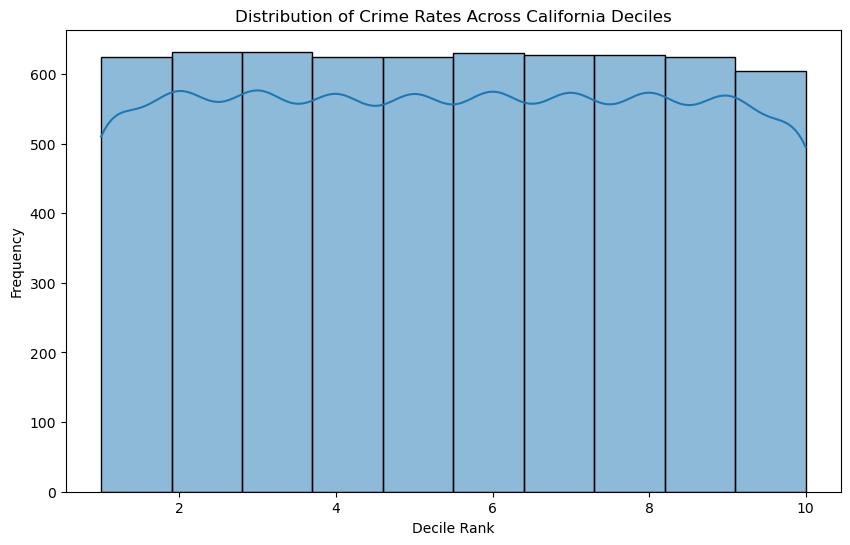

In [9]:
# Decile Ranking Analysis
# Analyzing how crime rates are distributed across California deciles
plt.figure(figsize=(10, 6))
sns.histplot(df['ca_decile'], bins=10, kde=True)
plt.title("Distribution of Crime Rates Across California Deciles")
plt.xlabel("Decile Rank")
plt.ylabel("Frequency")
plt.show()

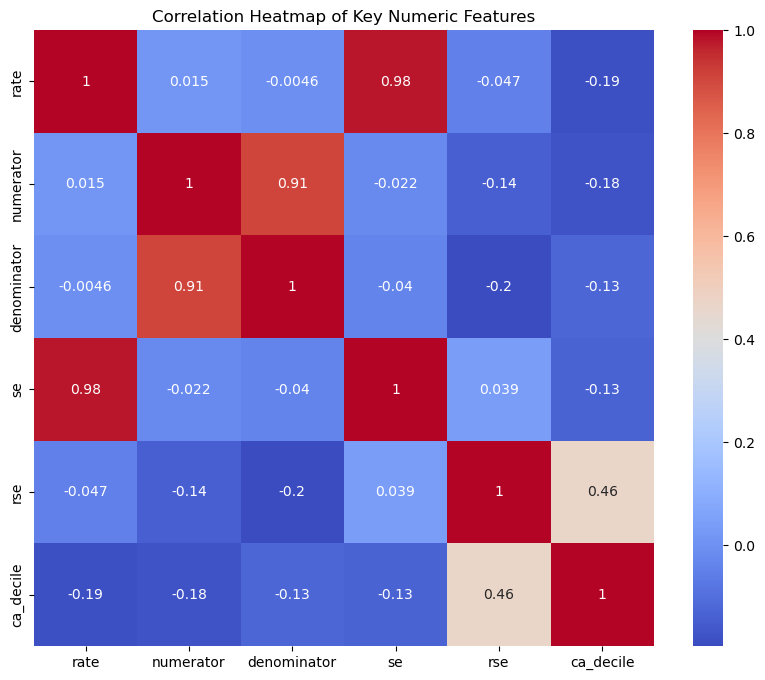

In [10]:
# Correlation Analysis
# Examine correlation between rate, numerator, and other numeric fields
plt.figure(figsize=(10, 8))
sns.heatmap(df[['rate', 'numerator', 'denominator', 'se', 'rse', 'ca_decile']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

In [13]:
# Summary statistics for crime rate by race
print(df.groupby('race_eth_name')['crime_rate'].describe())

# Summary statistics by region and year
region_year_summary = df.groupby(['region_name', 'reportyear'])['crime_rate'].mean().unstack()
print(region_year_summary)


                count      mean       std       min      25%       50%  \
race_eth_name                                                            
Total          6251.0  0.005652  0.027522  0.000025  0.00188  0.003389   

                    75%       max  
race_eth_name                      
Total          0.005493  0.795699  
reportyear                      2000      2001      2002      2003      2004  \
region_name                                                                    
Bay Area                    0.003574  0.003434  0.003238  0.003205  0.003111   
Butte                       0.003856  0.004838  0.005117  0.006973  0.007750   
Central/Southeast Sierra    0.007224  0.004270  0.005884  0.004581  0.005537   
Monterey Bay                0.005875  0.006025  0.005106  0.005143  0.005107   
North Coast                 0.004448  0.004680  0.005942  0.005406  0.004862   
Northeast Sierra            0.006352  0.004033  0.003615  0.003955  0.004006   
Northern Sacramento Valley  0

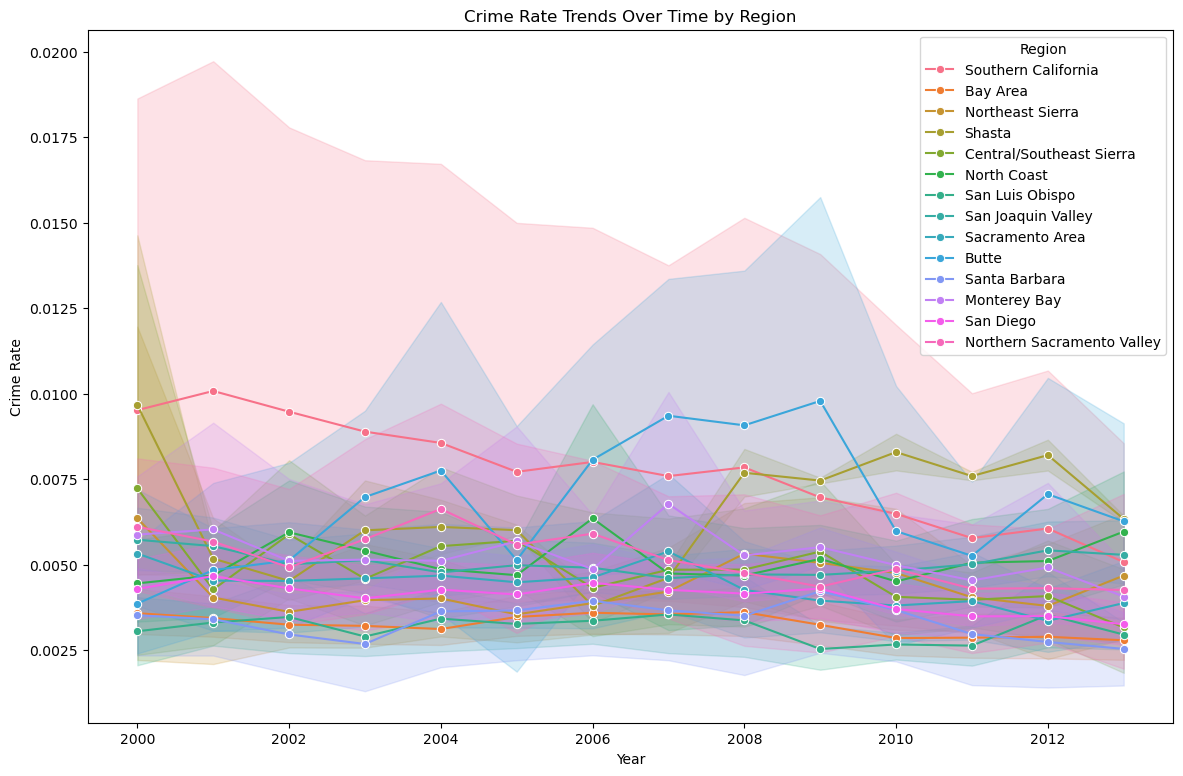

In [14]:
# Crime Rate Trends Over Time by Region

plt.figure(figsize=(14, 9))
sns.lineplot(data=df, x='reportyear', y='crime_rate', hue='region_name', marker="o")
plt.title('Crime Rate Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend(title='Region')
plt.show()


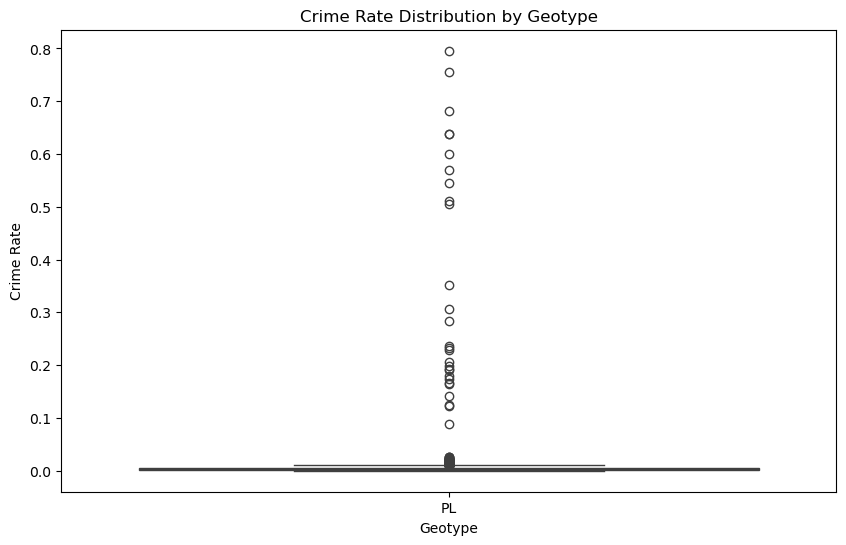

In [52]:
# Crime Rate Distribution by Geotype

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='geotype', y='crime_rate')
plt.title('Crime Rate Distribution by Geotype')
plt.xlabel('Geotype')
plt.ylabel('Crime Rate')
plt.show()

# Here’s a brief interpretation of each column:

* ind_id: Likely an identifier for each indicator or record.
* ind_definition: Provides a description or definition of the indicator, likely describing what each row of data represents.
* reportyear: Year the data was reported, formatted as an integer.
* race_eth_code and race_eth_name: These could represent the code and name for different race or ethnic groups in the data.
* geotype and geotypevalue: The type and specific value of geographic areas, such as city, county, or other administrative levels.
* geoname: The name of the geographic area (e.g., specific city or county name).
* county_fips and county_name: FIPS (Federal Information Processing Standards) code and name for the county, useful for geographic identification.
* region_code and region_name: Region code and name, providing regional classifications or grouping.
* strata_name_code, strata_name, strata_level_name_code, strata_level_name: These could represent various stratifications within the data, possibly demographic or risk level groupings.
* numerator and denominator: Likely used in calculating rates, where the numerator could be occurrences, and the denominator represents the population or total.
* rate: Calculated rate for the indicator, possibly derived from the numerator and denominator.
* ll_95ci and ul_95ci: Lower and upper bounds of the 95% confidence interval, showing the range of estimated rates.
* se: Standard error of the rate.
* rse: Relative standard error, which shows the precision of the estimate.
* ca_decile: Decile ranking for California, indicating where this data point falls in a ten-part scale relative to others.
* ca_rr: Relative risk ratio for California, comparing rates against a baseline.
* dof_population: Degrees of freedom for population, which might be used in variance calculations or other statistical measures.
* version: Dataset or record version identifier, useful for tracking updates.

In [41]:
df.to_csv('hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada2_CLEAN.csv', index=False)